<a href="https://colab.research.google.com/github/maslovalyudmila/ds_school_2020/blob/master/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import libraries

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
% matplotlib inline

# trees

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# import regression module

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# kNN

from sklearn.neighbors import KNeighborsClassifier 

# rf

from sklearn.ensemble import RandomForestClassifier

# gb

from sklearn.ensemble import GradientBoostingClassifier

# подключаем метрики

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [0]:
# import our data

df = pd.read_csv('/content/houses_to_rent_v2.csv')

In [0]:
# create a binary column with target variable 'best demand'

df['best demand'] = df['total (R$)']
df_1 = df['best demand']
df_1.loc[df_1 <= 3580] = 1
df_1.loc[df_1 > 3580] = 0

In [0]:
# make categorical features as quantitive

df['animal'] = df['animal'].factorize()[0]
df['furniture'] = df['furniture'].factorize()[0]

labelencoder = LabelEncoder()
df.city = labelencoder.fit_transform(df.city)
df.floor = labelencoder.fit_transform(df.floor)

In [0]:
# delete hierarchy

transformer = ColumnTransformer(transformers=[('city', OneHotEncoder(), [0,4])])
transformer = ColumnTransformer(transformers=[('floor', OneHotEncoder(), [0,34])])

In [0]:
# read first 5 rows of data

df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),best demand
0,4,70,2,1,1,32,0,0,2065,3300,211,42,5618,0
1,4,320,4,4,0,13,0,1,1200,4960,1750,63,7973,0
2,2,80,1,1,1,31,0,1,1000,2800,0,41,3841,0
3,2,51,2,1,0,12,0,1,270,1112,22,17,1421,1
4,4,25,1,1,0,1,1,1,0,800,25,11,836,1


In [0]:
# prepare sets for two task types

df_class = df.drop(['total (R$)'], axis=1)
df_class = df_class.drop(['best demand'], axis=1)
df_reg = df.drop(['best demand'], axis=1)
df_reg.values.reshape(-1,1)

X_array_class = np.array(df_class)
y_array_class = np.array(df['best demand'])

X_array_reg = np.array(df_reg)
y_array_reg = np.array(df['total (R$)'])

In [585]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),best demand
0,4,70,2,1,1,32,0,0,2065,3300,211,42,5618,0
1,4,320,4,4,0,13,0,1,1200,4960,1750,63,7973,0
2,2,80,1,1,1,31,0,1,1000,2800,0,41,3841,0
3,2,51,2,1,0,12,0,1,270,1112,22,17,1421,1
4,4,25,1,1,0,1,1,1,0,800,25,11,836,1


In [586]:
X_array_class

array([[    4,    70,     2, ...,  3300,   211,    42],
       [    4,   320,     4, ...,  4960,  1750,    63],
       [    2,    80,     1, ...,  2800,     0,    41],
       ...,
       [    3,    70,     3, ...,  6000,   332,    78],
       [    3,   120,     2, ..., 12000,   279,   155],
       [    4,    80,     2, ...,  1400,   165,    22]])

In [587]:
y_array_class

array([0, 0, 0, ..., 0, 0, 1])

In [588]:
X_array_reg

array([[    4,    70,     2, ...,   211,    42,  5618],
       [    4,   320,     4, ...,  1750,    63,  7973],
       [    2,    80,     1, ...,     0,    41,  3841],
       ...,
       [    3,    70,     3, ...,   332,    78,  7390],
       [    3,   120,     2, ...,   279,   155, 14020],
       [    4,    80,     2, ...,   165,    22,  1587]])

In [589]:
y_array_reg

array([ 5618,  7973,  3841, ...,  7390, 14020,  1587])

In [0]:
# define samples

X_class_train, X_class_test, y_class_train, y_class_test = train_test_split (X_array_class, y_array_class, test_size =0.33, random_state=42)

In [0]:
# create Decision Tree

dts = DecisionTreeClassifier()

In [592]:
# train

dts.fit(X_class_train, y_class_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
dts_predictions=dts.predict(X_array_class)

In [594]:
# test the tree

accuracy_score(y_array_class, dts_predictions) # 0.99 accuracy

0.9963524130190797

[Text(198.18177631578948, 207.55636363636364, 'X[9] <= 2715.0\ngini = 0.5\nsamples = 7163\nvalue = [3610, 3553]'),
 Text(107.81881578947369, 187.7890909090909, 'X[8] <= 1026.5\ngini = 0.142\nsamples = 3632\nvalue = [280, 3352]'),
 Text(67.18026315789474, 168.0218181818182, 'X[8] <= 916.5\ngini = 0.03\nsamples = 3265\nvalue = [50, 3215]'),
 Text(49.77947368421053, 148.25454545454545, 'X[10] <= 1170.0\ngini = 0.016\nsamples = 3174\nvalue = [25, 3149]'),
 Text(36.12315789473684, 128.48727272727274, 'X[9] <= 2645.0\ngini = 0.011\nsamples = 3166\nvalue = [18, 3148]'),
 Text(19.383157894736843, 108.72, 'X[8] <= 819.5\ngini = 0.004\nsamples = 3099\nvalue = [6, 3093]'),
 Text(7.048421052631579, 88.95272727272729, 'X[3] <= 2.5\ngini = 0.001\nsamples = 2966\nvalue = [1, 2965]'),
 Text(3.5242105263157897, 69.18545454545455, 'gini = 0.0\nsamples = 2871\nvalue = [0, 2871]'),
 Text(10.57263157894737, 69.18545454545455, 'X[8] <= 742.5\ngini = 0.021\nsamples = 95\nvalue = [1, 94]'),
 Text(7.0484210526

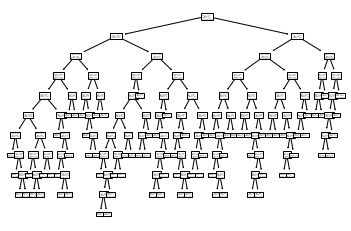

In [491]:
tree.plot_tree(dts)

In [0]:
# logistic regression

log_reg=LogisticRegression()

In [596]:
log_reg.fit(X_class_train, y_class_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
log_reg_predictions=log_reg.predict(X_array_class)

In [598]:
classification_report(y_array_class, log_reg_predictions)

'              precision    recall  f1-score   support\n\n           0       0.89      0.91      0.90      5347\n           1       0.91      0.88      0.90      5345\n\n    accuracy                           0.90     10692\n   macro avg       0.90      0.90      0.90     10692\nweighted avg       0.90      0.90      0.90     10692\n'

In [599]:
confusion_matrix(y_array_class, log_reg_predictions)

array([[4874,  473],
       [ 626, 4719]])

In [605]:
print((4874+4719)/(4874+473+626+4719)*100) #89% 

89.72128694350917


In [606]:
# accuracy

accuracy_score(y_array_class, log_reg_predictions) #0.89

0.8972128694350917

In [0]:
# linear regression 

X_reg_train.reshape(-1,1)
X_reg_train, y_reg_train, X_reg_test, y_reg_test = train_test_split (X_array_reg, y_array_reg, test_size =0.33, random_state=42)

In [0]:
reg=LinearRegression()

In [0]:
# train 

#X_reg_train.reshape(-1,1)

reg.fit(X_reg_train, y_reg_train) # 1D array features

In [0]:
reg_predictions=reg.predict(X_reg_test)

In [0]:
mean_squared_error(y_reg_test, reg_predictions)

In [0]:
# r2 metrics

r2_score(y_test, reg_predictions)

In [0]:
# accuracy

accuracy_score(y_reg_test, reg_predictions)

In [0]:
# kNN

knn = KNeighborsClassifier(n_neighbors=10)

In [637]:
# train the model

knn.fit(X_class_train, y_class_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
# predict

knn_predictions=knn.predict(X_class_test)

In [639]:
# accuracy

accuracy_score(y_class_test, knn_predictions) # 0.99

0.9917823746103712

In [0]:
# randomforest

rf = RandomForestClassifier(n_estimators=10)

In [428]:
rf = rf.fit(X_class_train, y_class_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [0]:
rf_predictions = rf.predict(X_class_test)

In [641]:
accuracy_score(y_class_test, rf_predictions) # 1.0 accuracy

1.0

In [0]:
# gradient boosting

gb = GradientBoostingClassifier(n_estimators=50)

In [434]:
gb.fit(X_class_train, y_class_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
gb_predictions = gb.predict(X_class_test)

In [436]:
accuracy_score(y_class_test, gb_predictions) # 1.0 

1.0

In [0]:
#CONCLUSION

#Excluding linear regression, the results of accuracy are:

# decision tree - 0.99
# logistic regression - 0.89
# kNN - 0.99
# random forest - 1.0

# So the most accurate is random forest basing on our results
